In [14]:
import torch

In [15]:
# Initialize a tensor with zeros
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

# Default of dtype is torch.float32

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [16]:
# Change the dtype
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [17]:
# Seeding
torch.manual_seed(0)
r1 = torch.rand(2, 2)
print('Random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nDifferent random tensor:')
print(r2)

torch.manual_seed(0)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3)

Random tensor:
tensor([[0.4963, 0.7682],
        [0.0885, 0.1320]])

Different random tensor:
tensor([[0.3074, 0.6341],
        [0.4901, 0.8964]])

Should match r1:
tensor([[0.4963, 0.7682],
        [0.0885, 0.1320]])


In [18]:
# Arithmetic operations, operations with scalars are distributed element-wise

ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2
print(twos)

threes = ones + twos
print(threes)
print(threes.shape)

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

In [ ]:
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[ 0.3953,  0.6000],
        [-0.6779, -0.4355]])

Absolute value of r:
tensor([[0.3953, 0.6000],
        [0.6779, 0.4355]])

Inverse sine of r:
tensor([[ 0.4064,  0.6435],
        [-0.7450, -0.4506]])

Determinant of r:
tensor(0.2346)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.6616,  0.7499],
        [ 0.7499,  0.6616]]),
S=tensor([1.0565, 0.2221]),
V=tensor([[-0.7287, -0.6848],
        [-0.6848,  0.7287]]))

Average and standard deviation of r:
(tensor(0.6224), tensor(-0.0295))

Maximum value of r:
tensor(0.6000)


In [ ]:
# Tensors carry metadata about the operations taken on it which autograd uses to compute gradients

In [23]:
import torch.nn as nn # the neural network layers are subclasses of nn.Module
import torch.nn.functional as F # the activation and max pooling functions

# LeNet-5

class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [ ]:
net = LeNet()
print(net)                         # inherits from nn.Module so it prints some useful info about the network

input = torch.rand(1, 1, 32, 32)   # stand-in for a 32x32 black & white image, extra dimension is the batch dimension
print('\nImage batch shape:')
print(input.shape)

output = net(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[-0.0330,  0.0509,  0.0563,  0.0573,  0.0526,  0.0737,  0.1090,  0.0774,
          0.0438,  0.0969]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


In [ ]:
# Dataset and DataLoader

%matplotlib inline

import torchvision # popular datasets
import torchvision.transforms as transforms # common image transformations

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(), # converts images loaded by Pillow to tensors
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # adjusts averages to zero and standard deviations to 0.5 (most activation functions have the strongest gradients around x = 0)

In [ ]:
# Download the CIFAR-10 dataset (32x32 color images with 10 classes of objects: 6 animals and 4 vehicles)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

truck  bird  bird  frog


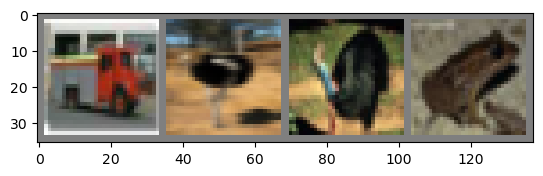

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
# Training Model

import torch.optim as optim

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


  cat plane  deer  ship


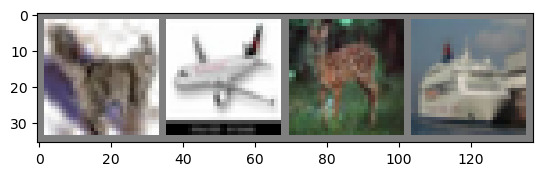

In [ ]:
# Check output from DataLoader

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [24]:
# LeNet adapted for 3-color images

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [25]:
criterion = nn.CrossEntropyLoss() # classic classification loss function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # SGD; net.parameters() is a collection of all the weights and biases in the network

In [26]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.188
[1,  4000] loss: 1.871
[1,  6000] loss: 1.682
[1,  8000] loss: 1.556
[1, 10000] loss: 1.511
[1, 12000] loss: 1.451
[2,  2000] loss: 1.378
[2,  4000] loss: 1.365
[2,  6000] loss: 1.311
[2,  8000] loss: 1.315
[2, 10000] loss: 1.275
[2, 12000] loss: 1.253
Finished Training


(Brad Heintz's explanation)

Here, we are doing only 2 training epochs (line 1) - that is, two passes over the training dataset. Each pass has an inner loop that iterates over the training data (line 4), serving batches of transformed input images and their correct labels.

Zeroing the gradients (line 9) is an important step. Gradients are accumulated over a batch; if we do not reset them for every batch, they will keep accumulating, which will provide incorrect gradient values, making learning impossible.

In line 12, we ask the model for its predictions on this batch. In the following line (13), we compute the loss - the difference between outputs (the model prediction) and labels (the correct output).

In line 14, we do the backward() pass, and calculate the gradients that will direct the learning.

In line 15, the optimizer performs one learning step - it uses the gradients from the backward() call to nudge the learning weights in the direction it thinks will reduce the loss.

The remainder of the loop does some light reporting on the epoch number, how many training instances have been completed, and what the collected loss is over the training loop.

In [27]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %
